<a href="https://colab.research.google.com/github/brgE-93/Analysededonnees/blob/main/kindle1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

**EDA**

In [58]:
#recuperation du jeu de donnees 
kindle_data=pd.read_csv('dataset_18000.csv')
df=kindle_data.copy()

In [4]:
def get_len(dataframe):
  return len(dataframe)

In [5]:
get_len(df)

18000

In [59]:
def null_values():
  return df.isnull().values.any()

In [60]:
null_values()

True

In [64]:
def remove_null_rows(df):
  df=df.dropna()
  print("nombre de lignes apres supression",get_len(df))

In [65]:
remove_null_rows(df)

nombre de lignes apres supression 17999


In [66]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [67]:
#supprimer les colonnes inutiles
cl=['ProductId','UserId','ProfileName']
def new_df(df,cl):
  return df.drop(columns=cl)


In [68]:
df=new_df(df,cl)

In [69]:
df.head()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
#df = df.reset_index().rename(columns={'index': 'Id'})

In [ ]:
#df=df.drop(columns=['Unnamed: 0'])

In [ ]:

#we choose to leave the name and id reviewers for anonymity reasons
df.Text.head(50)

0      This book was the very first bookmobile book I...
1      When I read the description for this book, I c...
2      I just had to edit this review. This book is a...
3      I don't normally buy 'mystery' novels because ...
4      This isn't the kind of book I normally read, a...
                             ...                        
495    This book has it all: time tunnel to the futur...
496    Loved this rural twist on a DD story. Nora sto...
497    I enjoy reading books that were written long a...
498    Written in a different era it still enthralls....
499    OMFG!!!!! This book is so delicious!!!!!! If y...
Name: reviewText, Length: 500, dtype: object

In [13]:
def wordinreview(dataframe):
    dic={}
    for index,rows in dataframe.iterrows():
        dic[index]=len(rows['Text'].split(" "))
    return pd.Series(dic)    

In [14]:
## Getting the number of words by splitting them by a space
def hist_lenght_word(df):
  words_per_review=wordinreview(df)
  words_per_review.hist(bins = 100)
  plt.xlabel('Review Length (words)')
  plt.ylabel('Frequency')
  plt.show()

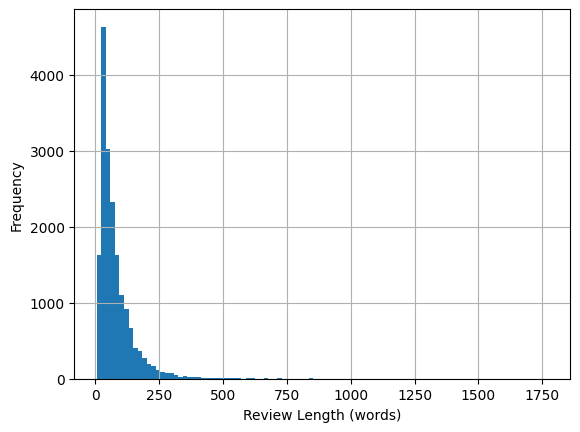

In [15]:
hist_lenght_word(df)

In [ ]:
max(wordinreview(df))

2156

In [16]:
#in average we have  word per review
print('Average words:', wordinreview(df).mean())
print('max num word :', wordinreview(df).max())
print('Skewness:', wordinreview(df).skew())

Average words: 79.51558419912217
max num word : 1772
Skewness: 4.335540370076879


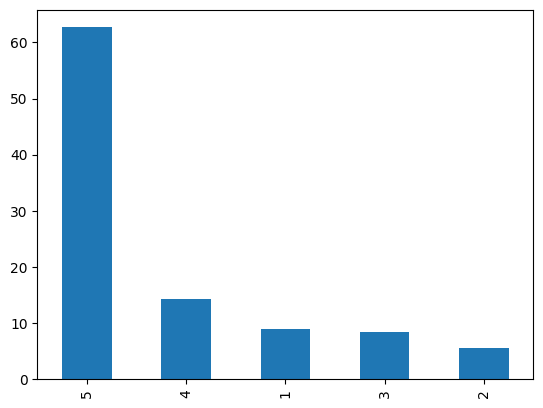

In [17]:
#distribution rating
#desequilibre
rating_percent=100*df.Score.value_counts()/len(df)
rating_percent.plot.bar()
plt.show()

In [ ]:
#ngram

In [18]:
from PIL import Image
from nltk.corpus import stopwords
from wordcloud import ImageColorGenerator,STOPWORDS,WordCloud

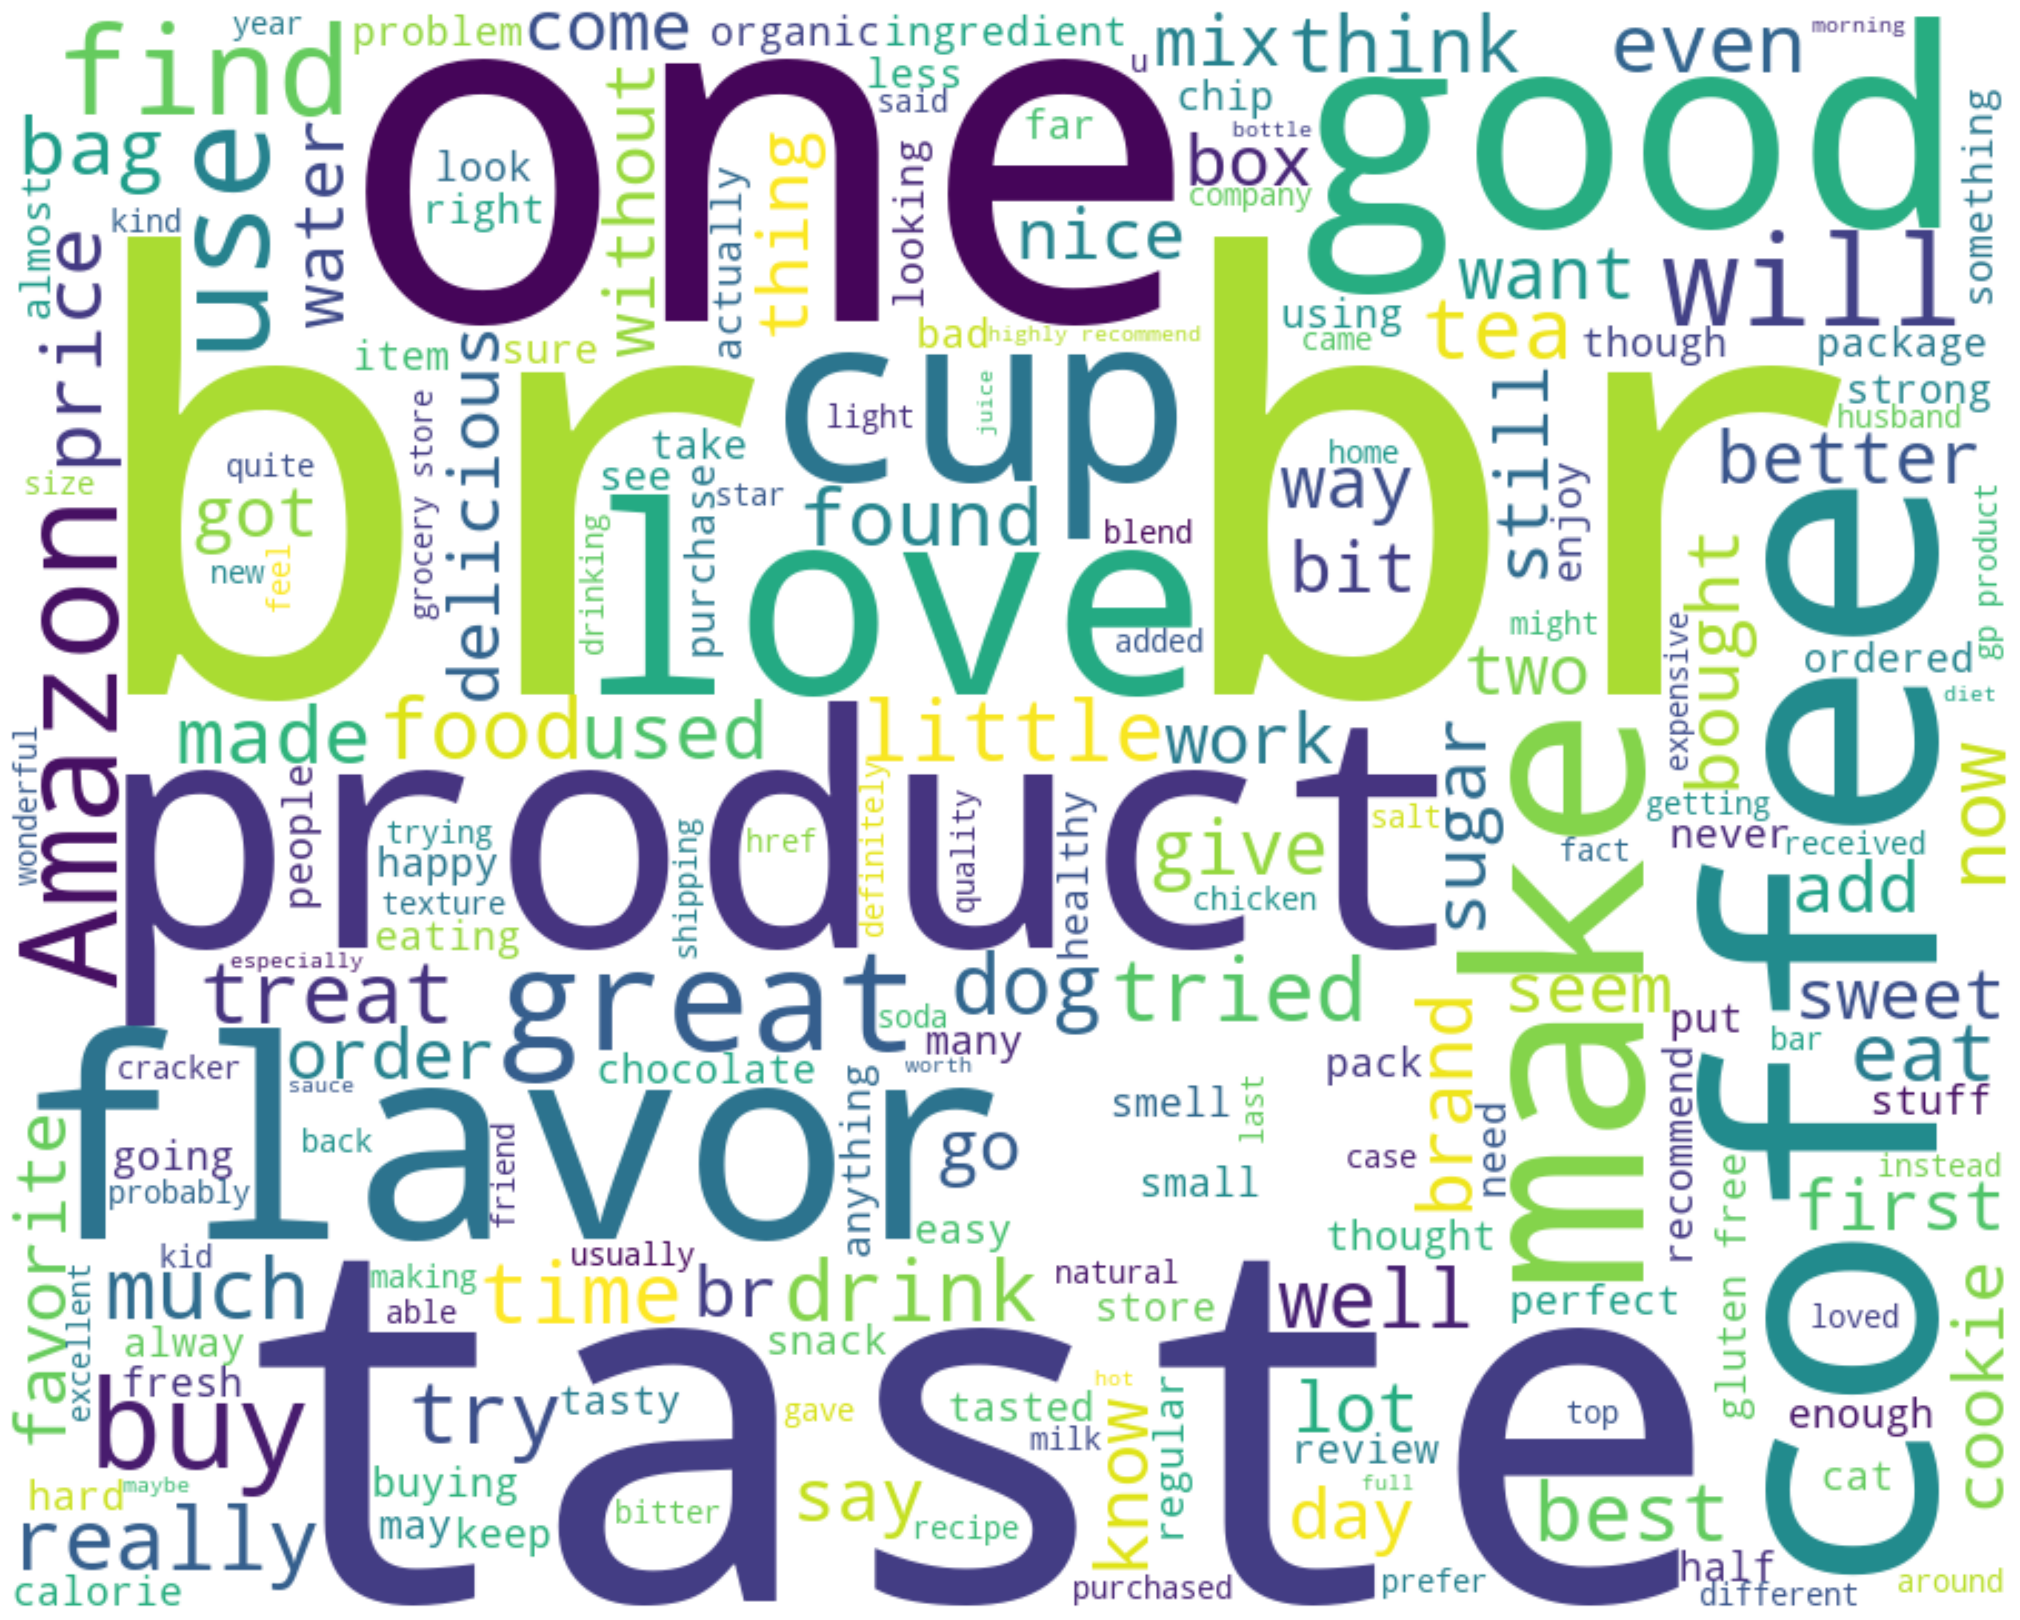

'\nplt.figure()\nplt.imshow(wordcloud, \n           interpolation="bilinear")\nplt.axis("off")\nplt.show()'

In [ ]:
#wordcloud refaire our trouver bonne forme
mask = np.array(Image.open("hat.png"))
word_cloud_text = ''.join(df['Text'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud( 
                      background_color="white",  
                      width=2000,
                    
                      mode="RGBA",
                      height=2000,
                      stopwords=stopwords,
                      mask=mask
                     ).generate(word_cloud_text)

# Create coloring from the image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation="bilinear")


# Store visualization to file
plt.savefig("book_logo.png", format="png")

plt.show()

"""
plt.figure()
plt.imshow(wordcloud, 
           interpolation="bilinear")
plt.axis("off")
plt.show()"""

In [ ]:
#mask

# VADER Sentiment Scores

In [39]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [40]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [41]:
analyser_object=SentimentIntensityAnalyzer()

In [74]:
#enlever le head  a la fin 
def vader_scores():
    dic= {}
    for i, row in tqdm(df.iterrows(), total=len(df)):
        review=row['Text']
        myid=row['Id']
        dic[myid]=analyser_object.polarity_scores(review)
    return dic



In [75]:
vader_scores()

  0%|          | 0/17999 [00:00<?, ?it/s]

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [76]:
df.Text[1]

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [77]:
analyser_object.polarity_scores(df.Text[1])

{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664}

In [78]:
vaders_df=pd.DataFrame(vader_scores()).T
vaders_df=vaders_df.reset_index().rename(columns={'index': 'Id'})
vaders_df=vaders_df.merge(df,how='left')


  0%|          | 0/17999 [00:00<?, ?it/s]

In [79]:
vaders_df

,Id,neg,neu,pos,compound,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...
17994,17996,0.000,0.847,0.153,0.7145,1,1,4,1300752000,peanut butter without all the fat?,I don't think this tastes more than OK when yo...
17995,17997,0.061,0.847,0.092,0.6757,1,1,3,1299715200,Good..but price is AWFUL,It's a relatively smaller jar that you get..ab...
17996,17998,0.000,0.850,0.150,0.9085,1,1,5,1294963200,Great stuff but much cheaper @ netrition,I love this peanut butter. It has 25% of the c...
17997,17999,0.000,0.680,0.320,0.9899,1,1,5,1273104000,a healthier peanut butter,I have been using Bell Plantation for 3 years ...


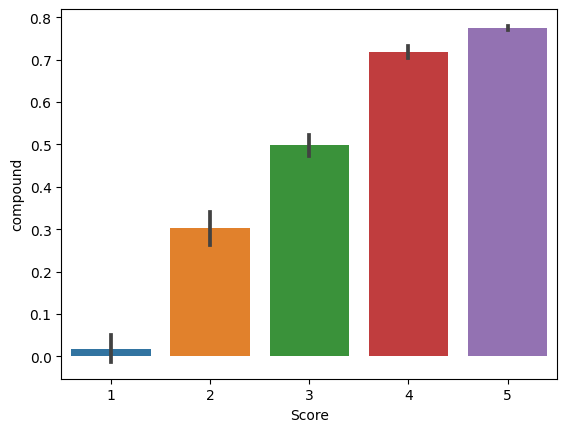

In [81]:
ax= sns.barplot(data=vaders_df,x='Score',y='compound')

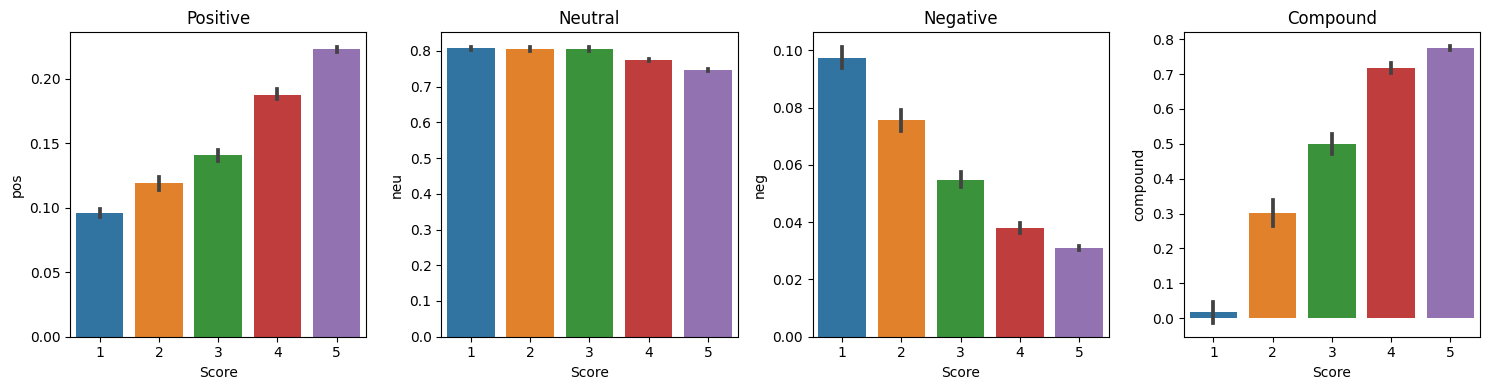

In [83]:
#mettre dans fonction et arranger lagancement 
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.barplot(data=vaders_df, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders_df, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders_df, x='Score', y='neg', ax=axs[2])
sns.barplot(data=vaders_df,x='Score',y='compound',ax=axs[3])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
axs[3].set_title('Compound')
plt.tight_layout()
plt.show()



---

#**Le modele DistilBert**

---



In [19]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 119.1 MB/s eta 0:00:00


In [20]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, AdamW
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report

In [21]:
nltk.download('stopwords')
#look if i can do my own stop word and if the text is all in english and if i ave to do lemini
# or n gramm.. et utiliser que distillbert.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
#separation du dataset en X et y 
X= df['Text'] 
y=df['Score']
# Split the dataset into train, validation, and test sets
# Split the dataset into train, validation, and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)
# Prepare the data for training
X_train = train_data['Text'].values
y_train = train_data['Score'].values

X_val = val_data['Text'].values
y_val = val_data['Score'].values

X_test = test_data['Text'].values
y_test = test_data['Score'].values
#texts_train, texts_test, ratings_train, ratings_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
pd.DataFrame(y_train).value_counts()

5    7231
4    1687
1    1043
3     934
2     624
dtype: int64

In [24]:
# Initialiser le tokenizer et le modèle DistilBERT
stop_words = set(stopwords.words('english'))
num_classes = len(df['Score'].unique())
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased', do_lower_case=True, stop_words=stop_words)
#model architecture
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=num_classes)
#print(model)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'pre_classifi

In [25]:
# Tokenization des textes d'entraînement et de test
train_encodings = tokenizer.batch_encode_plus(X_train.tolist(), padding=True, truncation=True, max_length=512, return_tensors='pt')
val_encodings = tokenizer.batch_encode_plus(X_val.tolist(), padding=True, truncation=True, max_length=512, return_tensors='pt')
test_encodings = tokenizer.batch_encode_plus(X_test.tolist(), padding=True, truncation=True, max_length=512, return_tensors='pt')


#encoded_train = tokenizer.batch_encode_plus(
 #   texts_train.tolist(), padding=True, truncation=True, max_length=512, return_tensors='pt'
#)
#encoded_test = tokenizer.batch_encode_plus(
 #   texts_test.tolist(), padding=True, truncation=True, max_length=512, return_tensors='pt'
#)

In [26]:
# Conversion des labels en tenseurs
#-1 pour rating de 0 a 4 
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], torch.tensor(y_train - 1))
val_dataset = TensorDataset(val_encodings['input_ids'], val_encodings['attention_mask'], torch.tensor(y_val - 1))
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], torch.tensor(y_test - 1))


#labels_train = torch.tensor((ratings_train - 1).tolist())#afaire si jutilise laute cross dtype=torch.long
#labels_test = torch.tensor((ratings_test - 1).tolist())

In [27]:
#Optimisation du traitement en mini-batch
# Création des datasets et des dataloaders
#train_dataset = TensorDataset(encoded_train['input_ids'], encoded_train['attention_mask'], labels_train)
#test_dataset = TensorDataset(encoded_test['input_ids'], encoded_test['attention_mask'], labels_test)

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


#train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

In [28]:
# optimiseur et de la fonction de perte
optimizer = AdamW(model.parameters(), lr=2e-5)#try with 5e-5
loss_function = torch.nn.CrossEntropyLoss()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
# Boucle d'entraînement
for epoch in tqdm(range(5), desc="Epochs"):
    model.train()
    total_loss = 0
    
    for batch in tqdm(train_loader, desc="Batches", leave=False):
        input_ids, attention_mask, labels = batch
        
        optimizer.zero_grad()
  
        # Passage avant du modèle
        outputs = model(
            input_ids = input_ids.to(device),
            attention_mask = attention_mask.to(device),
            labels = labels.to(device)
            
        )
        
        # Calcul de la perte
        loss = outputs.loss
        total_loss += loss.item()
        
        # Rétropropagation et mise à jour des poids
        loss.backward()
        optimizer.step()
    
    avg_loss = total_loss / len(train_loader)
    print(f"Époque {epoch+1} - Perte d'entraînement : {avg_loss}")



/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epochs:  20%|██        | 1/5 [08:30<34:02, 510.72s/it]

Époque 1 - Perte d'entraînement : 0.8229177610948681



Epochs:  40%|████      | 2/5 [17:09<25:46, 515.58s/it]

Époque 2 - Perte d'entraînement : 0.6135481237951252



Epochs:  60%|██████    | 3/5 [25:49<17:14, 517.28s/it]

Époque 3 - Perte d'entraînement : 0.47584477645448514



Epochs:  80%|████████  | 4/5 [34:28<08:38, 518.04s/it]

Époque 4 - Perte d'entraînement : 0.3577400890282459



Epochs: 100%|██████████| 5/5 [43:06<00:00, 517.38s/it]

Époque 5 - Perte d'entraînement : 0.25210785443842826


In [ ]:
#1:32:43<2:19:05, 2781.94s/it]Époque 2 - Perte d'entraînement : 0.5326844104342162
#2:19:00<1:32:38, 2779.48s/it]Époque 3 - Perte d'entraînement : 0.4233389311535284
#3:51:36<00:00, 2779.22s/it]Époque 5 - Perte d'entraînement : 0.24243458315683528
#0.25210785443842826 avec 18000 et 5

In [30]:
# Évaluation sur l'ensemble  validation 



print("evaluation du model ajouter matrice de confusion ")
model.eval()
with torch.no_grad():
    predicted_labels = []
    true_labels = []
    
    for batch in val_loader:
        input_ids, attention_mask, labels = batch
        
        outputs = model(
            input_ids = input_ids.to(device),
            attention_mask = attention_mask.to(device),
           
        )
        
        predicted_labels.extend(torch.argmax(outputs.logits, dim=1).tolist())
        true_labels.extend(labels.tolist())
#Micro-average is useful when there are class imbalances, as it gives more weight to the larger classes.    
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='micro')
    recall = recall_score(true_labels, predicted_labels, average='micro')
    f1 = f1_score(true_labels, predicted_labels, average='micro')
    

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

evaluation du model ajouter matrice de confusion 
Accuracy: 0.7438
Precision: 0.7438
Recall: 0.7438
F1-score: 0.7438


In [ ]:
#Accuracy: 0.7814 5 epoque et 70.000 donnee 
#Precision: 0.7814
#Recall: 0.7814
#F1-score: 0.7814
#mes labels true et predicted vont de 0 a 4 !!
#regarder si je peu equilibrer mes classes 

4 4


Evaluation sur Test data

In [33]:
# Evaluation on the test set
model.eval()
test_predictions = []
test_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids=input_ids.to(device), attention_mask=attention_mask.to(device))
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)

        test_predictions.extend(predictions.tolist())
        test_labels.extend(labels.tolist())
    accuracy_score(test_labels, test_predictions)
    precision = precision_score(test_labels, test_predictions, average='micro')
    recall = recall_score(test_labels, test_predictions, average='micro')
    f1 = f1_score(test_labels, test_predictions, average='micro')
    

# Confusion matrix and classification report
confusion_mat = confusion_matrix(test_labels, test_predictions)
classification_rep = classification_report(test_labels, test_predictions)

print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)
    
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Confusion Matrix:
[[ 234   33   14    9   33]
 [  89   56   35   24   15]
 [  30   36   88  109   62]
 [   7    5   15  204  271]
 [  19    1    8  107 2096]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.72      0.67       323
           1       0.43      0.26      0.32       219
           2       0.55      0.27      0.36       325
           3       0.45      0.41      0.43       502
           4       0.85      0.94      0.89      2231

    accuracy                           0.74      3600
   macro avg       0.58      0.52      0.53      3600
weighted avg       0.72      0.74      0.72      3600

Accuracy: 0.7438
Precision: 0.7439
Recall: 0.7439
F1-score: 0.7439


###Save model and prediction

In [38]:
# Save the trained model
torch.save(model.state_dict(), 'model.pt')

# Load the saved model
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=5)
model.load_state_dict(torch.load('model.pt'))
model.eval()

# Function to predict the rating of a new text input
def predict_rating(text):
    encoding = tokenizer.encode_plus(text, padding=True, truncation=True, max_length=128, return_tensors='pt')
    input_ids = encoding['input_ids']
    attention_mask = encoding['attention_mask']
    
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predicted_rating = torch.argmax(logits, dim=1)
    
    return predicted_rating.item()

# Example usage of the predict_rating function
new_text = "its very bad"
predicted_rating = predict_rating(new_text)
print(f"Predicted Rating: {predicted_rating}")

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'pre_classifi

Predicted Rating: 0
